In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#url = "https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74"
#df = pd.read_csv(url , parse_dates = ['Meldedatum', 'Refdatum'])

df = pd.read_csv('RKI_COVID19.csv' , parse_dates = ['Meldedatum', 'Refdatum'])

list_category = ['FID', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe', 'Geschlecht', 
                'IdLandkreis', 'Datenstand']
list_int = ['AnzahlFall', 'Anzahl_Todesfall', 'NeuerFall', 'NeuerTodesfall']

for i in list_category:
    df.loc[:, i] = df.loc[:, i].astype('category')

In [2]:
# Überprüfung der Dateneigenschaften

print('Eigenschaften der Datentypen: \n {} \n'.format(df.dtypes))
print('Fehlende Werte: \n {}'.format(df.isnull().sum()))

Eigenschaften der Datentypen: 
 FID                           category
IdBundesland                  category
Bundesland                    category
Landkreis                     category
Altersgruppe                  category
Geschlecht                    category
AnzahlFall                       int64
AnzahlTodesfall                  int64
Meldedatum              datetime64[ns]
IdLandkreis                   category
Datenstand                    category
NeuerFall                        int64
NeuerTodesfall                   int64
Refdatum                datetime64[ns]
NeuGenesen                       int64
AnzahlGenesen                    int64
IstErkrankungsbeginn             int64
Altersgruppe2                   object
dtype: object 

Fehlende Werte: 
 FID                     0
IdBundesland            0
Bundesland              0
Landkreis               0
Altersgruppe            0
Geschlecht              0
AnzahlFall              0
AnzahlTodesfall         0
Meldedatum              

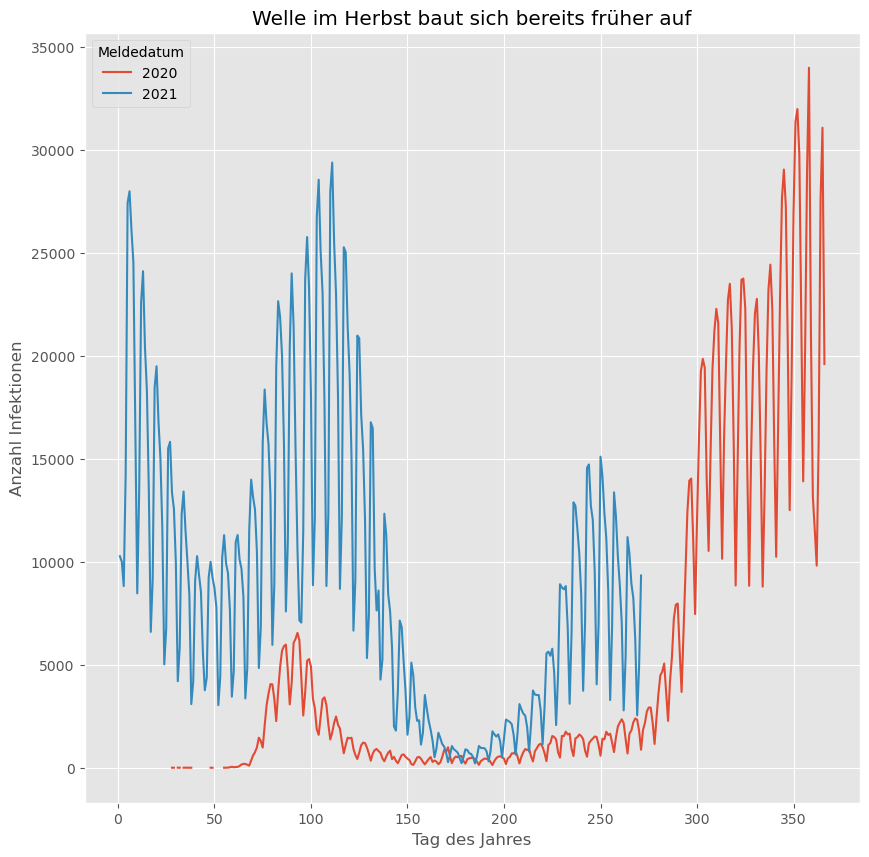

In [3]:
pd.crosstab(index = df['Meldedatum'].dt.dayofyear, columns = df['Meldedatum'].dt.year, values = df['AnzahlFall'], aggfunc = 'sum').plot(figsize = [10, 10])
plt.xlabel('Tag des Jahres')
plt.ylabel('Anzahl Infektionen')
plt.title('Welle im Herbst baut sich bereits früher auf')
plt.show()

<ipython-input-4-8f96b95b66b1>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  pd.crosstab(index = df['Meldedatum'].dt.week, columns = df['Meldedatum'].dt.year, values = df['AnzahlFall'], aggfunc = 'sum').plot(figsize = [10,10])


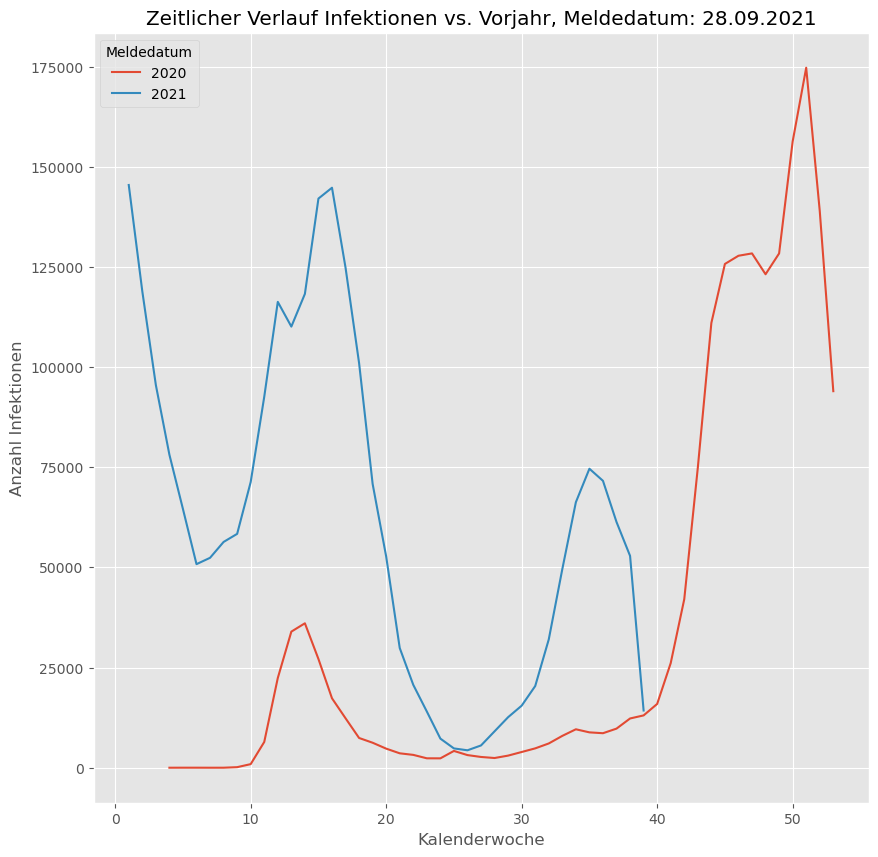

In [4]:
pd.crosstab(index = df['Meldedatum'].dt.week, columns = df['Meldedatum'].dt.year, values = df['AnzahlFall'], aggfunc = 'sum').plot(figsize = [10,10])
plt.title('Zeitlicher Verlauf Infektionen vs. Vorjahr, Meldedatum: {}'.format(df['Meldedatum'].max().strftime(format = '%d.%m.%Y')))
plt.ylabel('Anzahl Infektionen')
plt.xlabel('Kalenderwoche')
plt.show()

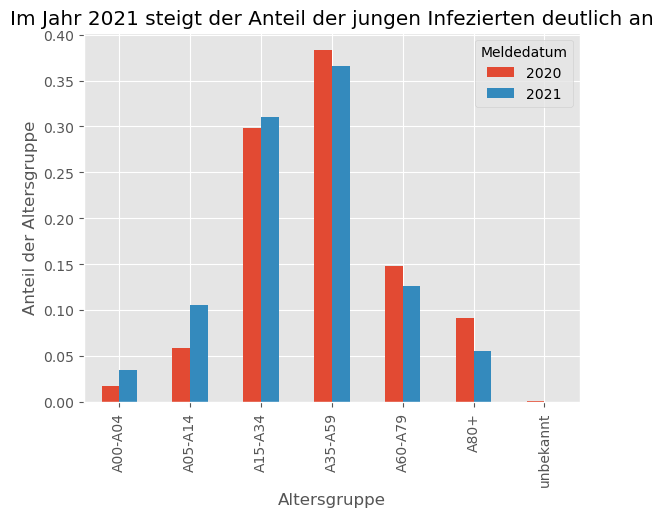

In [5]:
pd.crosstab(index = df['Altersgruppe'], columns = df['Meldedatum'].dt.year, values = df['AnzahlFall'], aggfunc = 'sum', normalize = 'columns').plot(kind = 'bar')
plt.title('Im Jahr {} steigt der Anteil der jungen Infezierten deutlich an'.format(df['Meldedatum'].dt.year.max()))
plt.ylabel('Anteil der Altersgruppe')
plt.show()

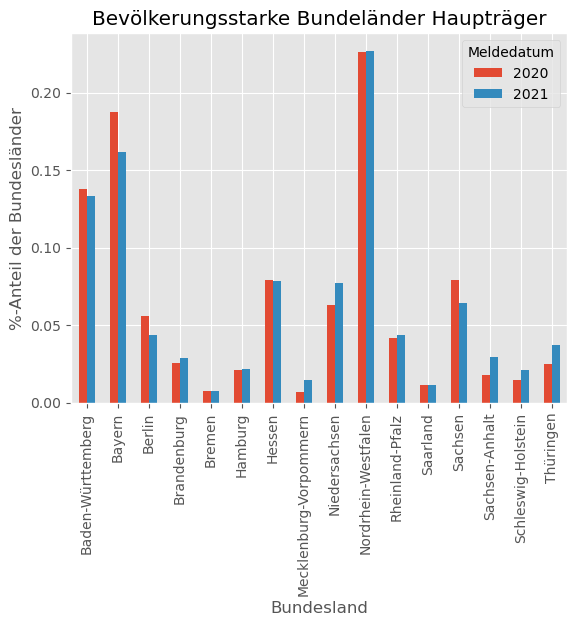

In [6]:
pd.crosstab(index = df['Bundesland'], columns = df['Meldedatum'].dt.year, values = df['AnzahlFall'], aggfunc = 'sum', normalize = 'columns').plot(kind = 'bar')
plt.title('Bevölkerungsstarke Bundeländer Haupträger')
plt.ylabel('%-Anteil der Bundesländer')
plt.show()

['Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 'Bremen', 'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz', 'Baden-Württemberg', 'Bayern', 'Saarland', 'Berlin', 'Brandenburg', 'Mecklenburg-Vorpommern', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen']


<ipython-input-7-49630cad7d07>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  pd.crosstab(index = df_plot['Meldedatum'].dt.week, columns = df_plot['Meldedatum'].dt.year,
<ipython-input-7-49630cad7d07>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  pd.crosstab(index = df_plot['Meldedatum'].dt.week, columns = df_plot['Meldedatum'].dt.year,
<ipython-input-7-49630cad7d07>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  pd.crosstab(index = df_plot['Meldedatum'].dt.week, columns = df_plot['Meldedatum'].dt.year,
<ipython-input-7-49630cad7d07>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  pd.crosstab(index = df_plot['Meldedatum'].dt.week, columns = df_plot['Me

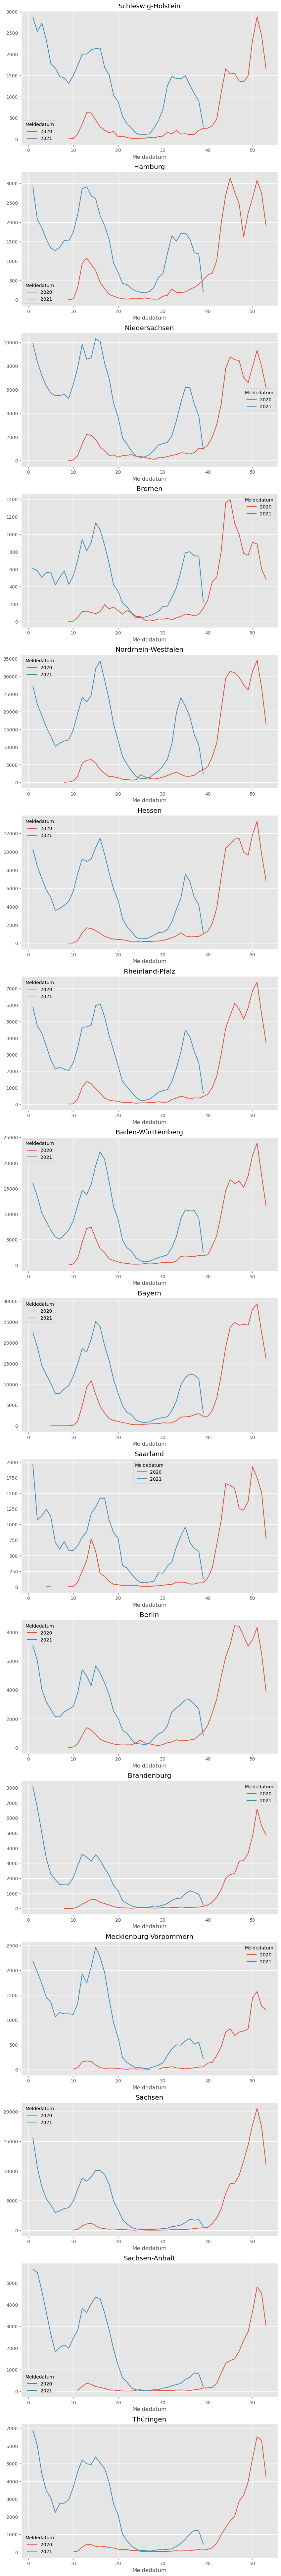

"\npd.crosstab(index = df['Meldedatum'], columns = df['Bundesland'], values = df['AnzahlFall'], aggfunc = 'sum').plot()\nplt.title('Bevölkerungsstarke Bundeländer Haupträger')\nplt.show()"

In [7]:
laender = list(df['Bundesland'].unique())
print(laender)

fig, ax = plt.subplots(nrows = len(laender), figsize = [10, 100])

for i, j in enumerate(laender):
    mask = df['Bundesland'] == j
    df_plot = df.loc[mask, :]
    pd.crosstab(index = df_plot['Meldedatum'].dt.week, columns = df_plot['Meldedatum'].dt.year, 
                values = df_plot['AnzahlFall'], aggfunc = 'sum').plot(ax = ax[i])

for i, j in enumerate(laender):  
    ax[i].set_title(laender[i])
 


plt.show()
'''
pd.crosstab(index = df['Meldedatum'], columns = df['Bundesland'], values = df['AnzahlFall'], aggfunc = 'sum').plot()
plt.title('Bevölkerungsstarke Bundeländer Haupträger')
plt.show()'''